In [1]:
import pandas as pd
import starbars

# 'project_id', 'ensemble_id', 'cell_line', 'region_id', 'gene_id', 'enh_id', 'dist_avg_dist', 'has_link'
distances_with_links = pd.read_parquet("./links/experiment_4/distances_with_links.parquet").rename({"dist_avg_dist": "avg_dist"}, axis=1)

In [2]:
distances_with_links

,project_id,ensemble_id,cell_line,region_id,gene_id,enh_id,avg_dist,has_link
0,8k_models_project_GM12878,models3D_GM12878_Nean_models3D_GM12878_Nean_re...,GM12878,chr20:49767977-51771783,ENSG00000000419,chr20:49823143-49824413,7.876060,False
1,8k_models_project_GM12878,models3D_GM12878_Nean_models3D_GM12878_Nean_re...,GM12878,chr20:49767977-51771783,ENSG00000000419,chr20:50012133-50013263,9.131163,False
2,8k_models_project_GM12878,models3D_GM12878_Nean_models3D_GM12878_Nean_re...,GM12878,chr20:49767977-51771783,ENSG00000000419,chr20:50492953-50494843,9.038205,False
3,8k_models_project_GM12878,models3D_GM12878_Nean_models3D_GM12878_Nean_re...,GM12878,chr20:49767977-51771783,ENSG00000000419,chr20:50795173-50796203,7.966821,False
4,8k_models_project_GM12878,models3D_GM12878_Nean_models3D_GM12878_Nean_re...,GM12878,chr20:49767977-51771783,ENSG00000000419,chr20:51549141-51550061,8.569405,False
...,...,...,...,...,...,...,...,...
2352716,8k_models_project_HFFC6,models3D_HFFC6_Nean_models3D_HFFC6_Nean_result...,HFFC6,chr1:29302990-31311589,ENSG00000289710,chr1:30645703-30647253,13.861824,False
2352717,8k_models_project_HFFC6,models3D_HFFC6_Nean_models3D_HFFC6_Nean_result...,HFFC6,chr1:29302990-31311589,ENSG00000289710,chr1:30667703-30671613,17.531174,False
2352718,8k_models_project_HFFC6,models3D_HFFC6_Nean_models3D_HFFC6_Nean_result...,HFFC6,chr1:29302990-31311589,ENSG00000289710,chr1:30877163-30878613,25.045715,False
2352719,8k_models_project_HFFC6,models3D_HFFC6_Nean_models3D_HFFC6_Nean_result...,HFFC6,chr1:29302990-31311589,ENSG00000289710,chr1:30933343-30935683,23.140881,False


In [3]:
gm12878_neanderthal_df_ref = distances_with_links[distances_with_links['cell_line'] == 'GM12878']
hffc6_neanderthal_df_ref = distances_with_links[distances_with_links['cell_line'] == 'HFFC6']
h1esc_neanderthal_df_ref = distances_with_links[distances_with_links['cell_line'] == 'H1ESC']

In [4]:
distance_cutoff = {
    'H1ESC_Nean': 1.5819487888988626,
    'H1ESC_Deni': 1.5940225214185284,
    'HFFC6_Nean': 1.4982763183612486,
    'HFFC6_Deni': 1.7777412978743463,
    'WTC11_Nean': 0.49185075802354294,
    'WTC11_Deni': 0.49946283771094635,
    'GM12878_Nean': 1.3194976373807719,
    'GM12878_Deni': 1.2678860440889042
}

gm12878_neanderthal_df_ref = gm12878_neanderthal_df_ref[gm12878_neanderthal_df_ref["avg_dist"] > distance_cutoff["GM12878_Nean"]]
hffc6_neanderthal_df_ref = hffc6_neanderthal_df_ref[hffc6_neanderthal_df_ref["avg_dist"] > distance_cutoff["HFFC6_Nean"]]
h1esc_neanderthal_df_ref = h1esc_neanderthal_df_ref[h1esc_neanderthal_df_ref["avg_dist"] > distance_cutoff["H1ESC_Nean"]]

# gm12878_neanderthal_df_ref = gm12878_neanderthal_df_ref[gm12878_neanderthal_df_ref['enh_tSS_distance'] < 1_000_000]
# hffc6_neanderthal_df_ref = hffc6_neanderthal_df_ref[hffc6_neanderthal_df_ref['enh_tSS_distance'] < 1_000_000]
# h1esc_neanderthal_df_ref = h1esc_neanderthal_df_ref[h1esc_neanderthal_df_ref['enh_tSS_distance'] < 1_000_000]

In [5]:
gm12878_gene_to_closest_avg_enhancer_all = (
    gm12878_neanderthal_df_ref
    .groupby("gene_id")
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .sort_values(by="avg_dist", ascending=True)
)
gm12878_gene_to_closest_avg_enhancer_all['has_link'] = (
    gm12878_gene_to_closest_avg_enhancer_all.index
    .isin(gm12878_neanderthal_df_ref[gm12878_neanderthal_df_ref["has_link"] == True]["gene_id"].unique())
)

hffc6_gene_to_closest_avg_enhancer_all = (
    hffc6_neanderthal_df_ref
    .groupby("gene_id")
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .sort_values(by="avg_dist", ascending=True)
)

hffc6_gene_to_closest_avg_enhancer_all['has_link'] = (
    hffc6_gene_to_closest_avg_enhancer_all.index
    .isin(hffc6_neanderthal_df_ref[hffc6_neanderthal_df_ref["has_link"] == True]["gene_id"].unique())
)

h1esc_gene_to_closest_avg_enhancer_all = (
    h1esc_neanderthal_df_ref
    .groupby("gene_id")
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .sort_values(by="avg_dist", ascending=True)
)

h1esc_gene_to_closest_avg_enhancer_all['has_link'] = (
    h1esc_gene_to_closest_avg_enhancer_all.index
    .isin(h1esc_neanderthal_df_ref[h1esc_neanderthal_df_ref["has_link"] == True]["gene_id"].unique())
)

U-statistic: 4557735.0, p-value: 1.4852613998710292e-80


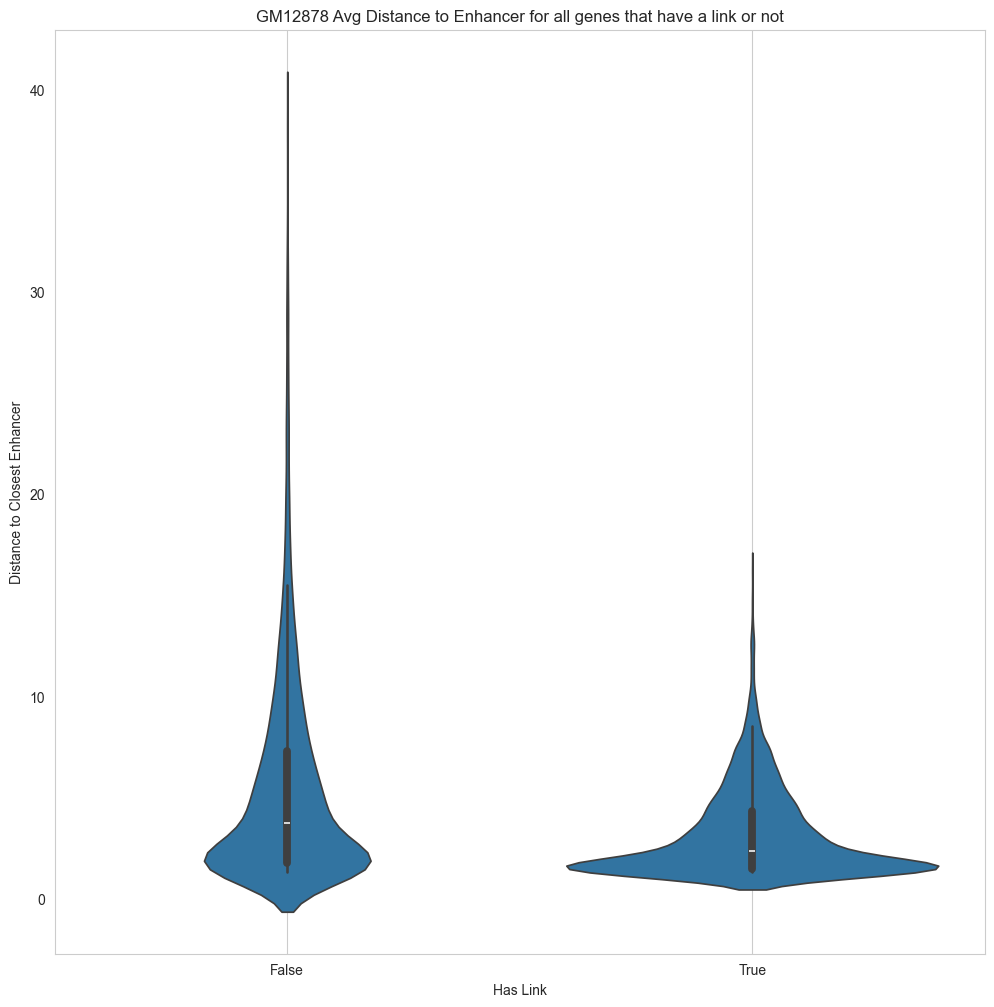

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 12))
ax = sns.violinplot(data=gm12878_gene_to_closest_avg_enhancer_all, x="has_link", y="min_dist")

# show mannwhitney U test
from scipy.stats import mannwhitneyu
has_link = gm12878_gene_to_closest_avg_enhancer_all[gm12878_gene_to_closest_avg_enhancer_all["has_link"] == True]["min_dist"]
no_link = gm12878_gene_to_closest_avg_enhancer_all[gm12878_gene_to_closest_avg_enhancer_all["has_link"] == False]["min_dist"]
stat, p = mannwhitneyu(has_link, no_link, alternative='two-sided')
print(f"U-statistic: {stat}, p-value: {p}")

# show the p value
# starbars.draw_annotation(
#     annotations=[('has_link', 'min_dist', p)],
#     ax=ax
# )

plt.xlabel("Has Link")
plt.ylabel("Distance to Closest Enhancer")
plt.title("GM12878 Avg Distance to Enhancer for all genes that have a link or not")
plt.grid()
plt.show()

U-statistic: 4199314.5, p-value: 1.615056162416597e-80


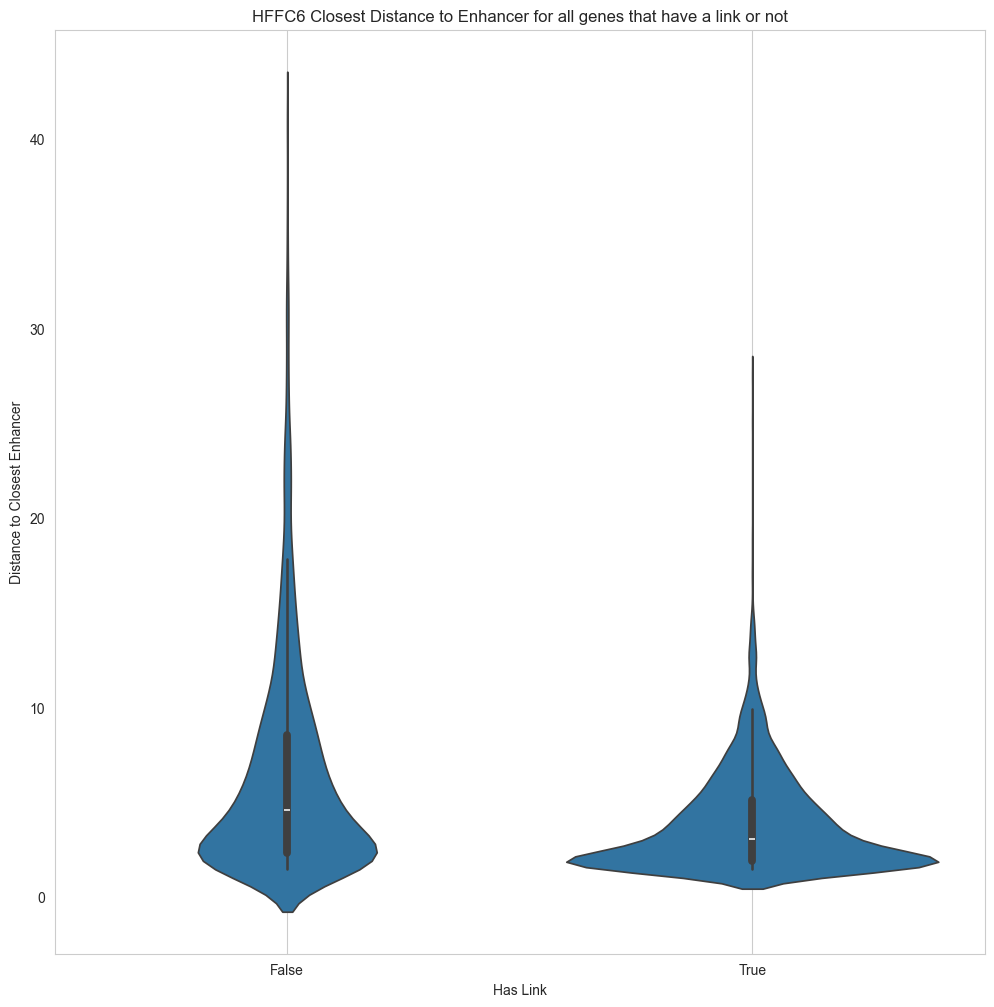

In [7]:
 # Box plot of the distance to the closest enhancer for all genes that have a link or not in HFFC6
plt.figure(figsize=(12, 12))
sns.violinplot(data=hffc6_gene_to_closest_avg_enhancer_all, x="has_link", y="min_dist")

# show mannwhitney U test
from scipy.stats import mannwhitneyu
has_link = hffc6_gene_to_closest_avg_enhancer_all[hffc6_gene_to_closest_avg_enhancer_all["has_link"] == True]["min_dist"]
no_link = hffc6_gene_to_closest_avg_enhancer_all[hffc6_gene_to_closest_avg_enhancer_all["has_link"] == False]["min_dist"]
stat, p = mannwhitneyu(has_link, no_link, alternative='two-sided')
print(f"U-statistic: {stat}, p-value: {p}")

plt.xlabel("Has Link")
plt.ylabel("Distance to Closest Enhancer")
plt.title("HFFC6 Closest Distance to Enhancer for all genes that have a link or not")
plt.grid()
plt.show()

U-statistic: 4465277.0, p-value: 2.1248881833616996e-65


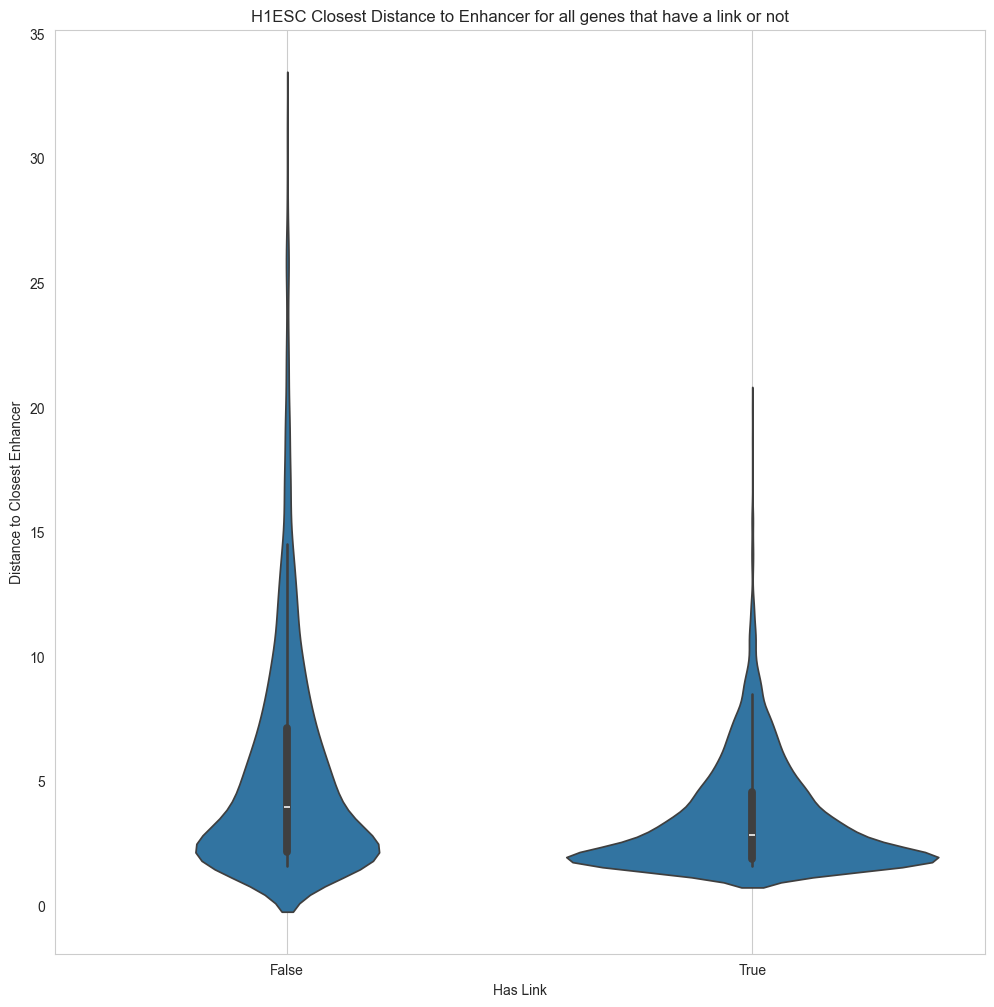

In [8]:
# Box plot of the distance to the closest enhancer for all genes that have a link or not in H1ESC
plt.figure(figsize=(12, 12))
sns.violinplot(data=h1esc_gene_to_closest_avg_enhancer_all, x="has_link", y="min_dist")

# show mannwhitney U test
from scipy.stats import mannwhitneyu
has_link = h1esc_gene_to_closest_avg_enhancer_all[h1esc_gene_to_closest_avg_enhancer_all["has_link"] == True]["min_dist"]
no_link = h1esc_gene_to_closest_avg_enhancer_all[h1esc_gene_to_closest_avg_enhancer_all["has_link"] == False]["min_dist"]
stat, p = mannwhitneyu(has_link, no_link, alternative='two-sided')
print(f"U-statistic: {stat}, p-value: {p}")

plt.xlabel("Has Link")
plt.ylabel("Distance to Closest Enhancer")
plt.title("H1ESC Closest Distance to Enhancer for all genes that have a link or not")
plt.grid()
plt.show()

U-statistic: 4557735.0, p-value: 1.4852613998710292e-80
2.0 0.03


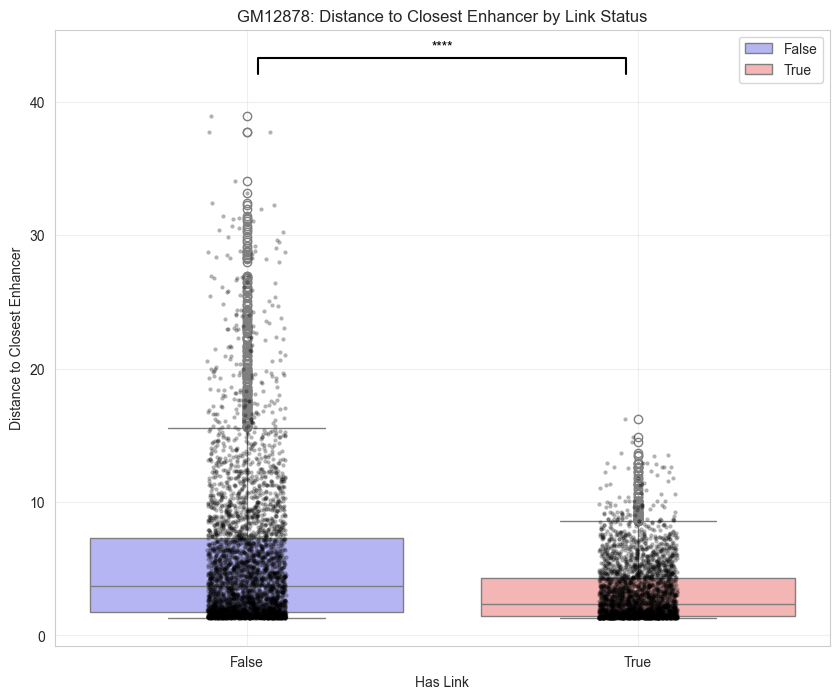

U-statistic: 4199314.5, p-value: 1.615056162416597e-80
2.0 0.03


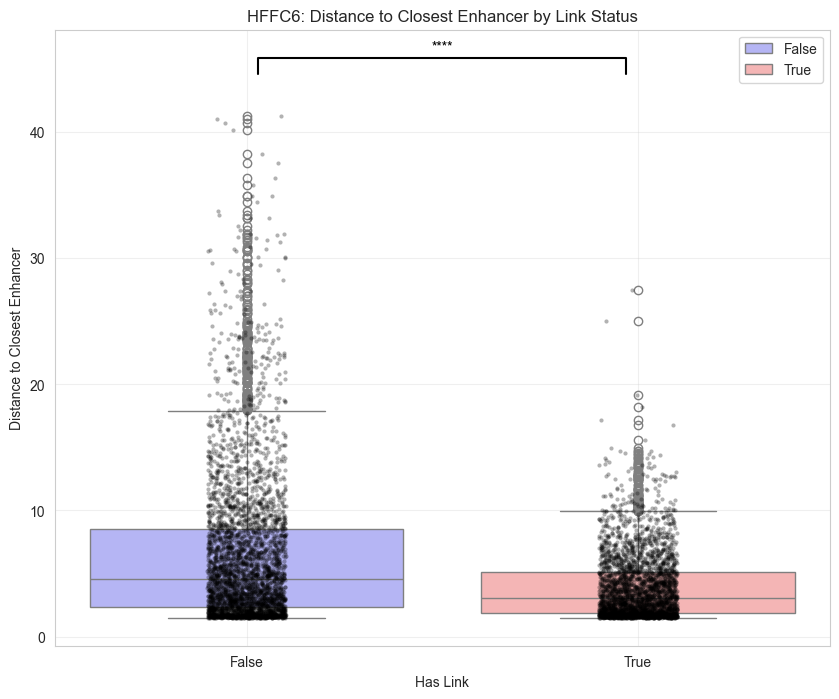

U-statistic: 4465277.0, p-value: 2.1248881833616996e-65
2.0 0.03


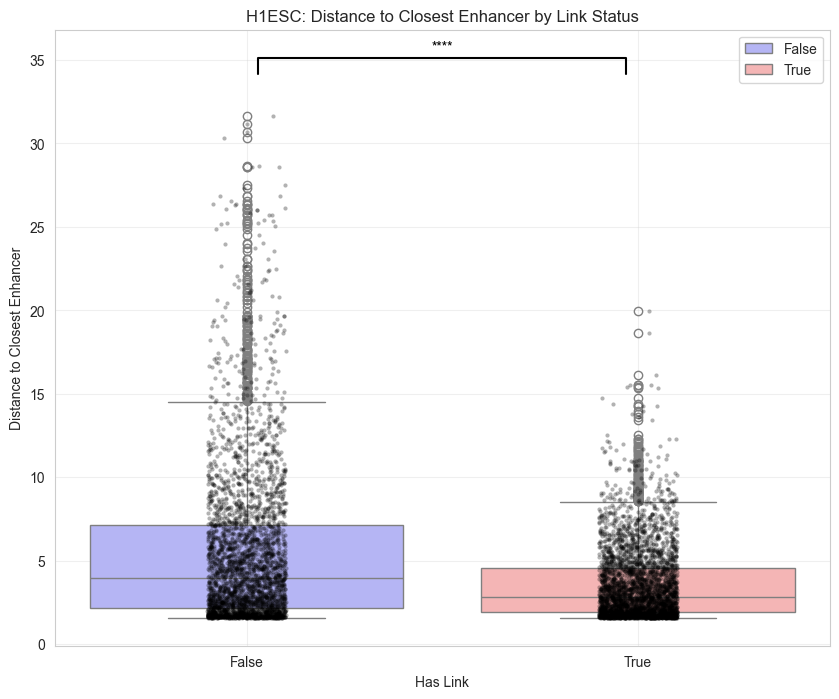

In [9]:

def plot_with_starbars(df, column, title, palette=None):
    """
    Creates a boxplot with significance stars using starbars package.

    Args:
        df: DataFrame with 'has_link' column
        column: Column to plot (e.g. 'min_dist')
        title: Plot title
        palette: Optional color palette for the plot
    """
    plt.figure(figsize=(10, 8))

    # Create boxplot
    ax = sns.boxplot(
        data=df,
        x='has_link',
        y=column,
        palette=palette or ['#AAAAFF', '#FFAAAA'],
        hue='has_link'
    )

    # Add individual data points
    sns.stripplot(
        data=df,
        x='has_link',
        y=column,
        color='black',
        size=3,
        alpha=0.3,
        jitter=True
    )

    # Perform Mann-Whitney U test
    has_link = df[df["has_link"] == True][column]
    no_link = df[df["has_link"] == False][column]
    stat, p = mannwhitneyu(has_link, no_link, alternative='two-sided')
    print(f"U-statistic: {stat}, p-value: {p}")

    # Add significance stars using starbars
    annotations = [(False, True, p)]  # Compare False vs True
    starbars.draw_annotation(
        annotations=annotations,
        ax=ax
    )

    plt.title(title)
    plt.xlabel("Has Link")
    plt.ylabel("Distance to Closest Enhancer")
    plt.grid(alpha=0.3)
    return plt

# Example usage for each cell line
plot_with_starbars(
    gm12878_gene_to_closest_avg_enhancer_all,
    "min_dist",
    "GM12878: Distance to Closest Enhancer by Link Status"
).show()

plot_with_starbars(
    hffc6_gene_to_closest_avg_enhancer_all,
    "min_dist",
    "HFFC6: Distance to Closest Enhancer by Link Status"
).show()

plot_with_starbars(
    h1esc_gene_to_closest_avg_enhancer_all,
    "min_dist",
    "H1ESC: Distance to Closest Enhancer by Link Status"
).show()

In [10]:
gm12878_neanderthal_all_pairs_with_has_link = gm12878_neanderthal_df_ref.copy()
gm12878_neanderthal_all_pairs_with_has_link['has_link'] = (
    gm12878_neanderthal_all_pairs_with_has_link['gene_id'].isin(gm12878_neanderthal_df_ref[gm12878_neanderthal_df_ref["has_link"] == True]['gene_id'].unique())
    & gm12878_neanderthal_all_pairs_with_has_link['enh_id'].isin(gm12878_neanderthal_df_ref[gm12878_neanderthal_df_ref["has_link"] == True]['enh_id'].unique())
)

hffc6_neanderthal_all_pairs_with_has_link = hffc6_neanderthal_df_ref.copy()
hffc6_neanderthal_all_pairs_with_has_link['has_link'] = (
    hffc6_neanderthal_all_pairs_with_has_link['gene_id'].isin(hffc6_neanderthal_df_ref[hffc6_neanderthal_df_ref["has_link"] == True]['gene_id'].unique())
    & hffc6_neanderthal_all_pairs_with_has_link['enh_id'].isin(hffc6_neanderthal_df_ref[hffc6_neanderthal_df_ref["has_link"] == True]['enh_id'].unique())
)

h1esc_neanderthal_all_pairs_with_has_link = h1esc_neanderthal_df_ref.copy()
h1esc_neanderthal_all_pairs_with_has_link['has_link'] = (
    h1esc_neanderthal_all_pairs_with_has_link['gene_id'].isin(h1esc_neanderthal_df_ref[h1esc_neanderthal_df_ref["has_link"] == True]['gene_id'].unique())
    & h1esc_neanderthal_all_pairs_with_has_link['enh_id'].isin(h1esc_neanderthal_df_ref[h1esc_neanderthal_df_ref["has_link"] == True]['enh_id'].unique())
)

In [11]:
all_pairs_joined_hffc6_h1esc = (
    gm12878_neanderthal_all_pairs_with_has_link
    .merge(
        hffc6_neanderthal_all_pairs_with_has_link,
        on=["region_id", "gene_id", "enh_id"],
        suffixes=("_gm12878", "_hffc6"),
        how="inner"
    )
)

# region_id, gene_id, enh_id, gm12878_avg_dist, hffc6_avg_dist -> region_id, gene_id, enh_id, avg_dist, type (gm12878, hffc6)
# group by type and gene_id, and calculate the average distance
all_pairs_by_type_gm12878_yes_link_hffc6_no_link = (
    all_pairs_joined_hffc6_h1esc
    [
        (all_pairs_joined_hffc6_h1esc["has_link_gm12878"] == True) &
        (all_pairs_joined_hffc6_h1esc["has_link_hffc6"] == False)
        ]
    .melt(
        id_vars=["region_id", "gene_id", "enh_id"],
        value_vars=["avg_dist_gm12878", "avg_dist_hffc6"],
        var_name="type",
        value_name="avg_dist"
    )
    .assign(type=lambda x: x["type"].str.replace("avg_dist_", ""))
    .groupby(["type", "gene_id"])
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .reset_index()
)

all_pairs_by_type_hffc6_yes_link_gm12878_no_link = (
    all_pairs_joined_hffc6_h1esc[
        (all_pairs_joined_hffc6_h1esc["has_link_hffc6"] == True) &
        (all_pairs_joined_hffc6_h1esc["has_link_gm12878"] == False)
        ]
    .melt(
        id_vars=["region_id", "gene_id", "enh_id"],
        value_vars=["avg_dist_gm12878", "avg_dist_hffc6"],
        var_name="type",
        value_name="avg_dist"
    )
    .assign(type=lambda x: x["type"].str.replace("avg_dist_", ""))
    .groupby(["type", "gene_id"])
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .reset_index()
)

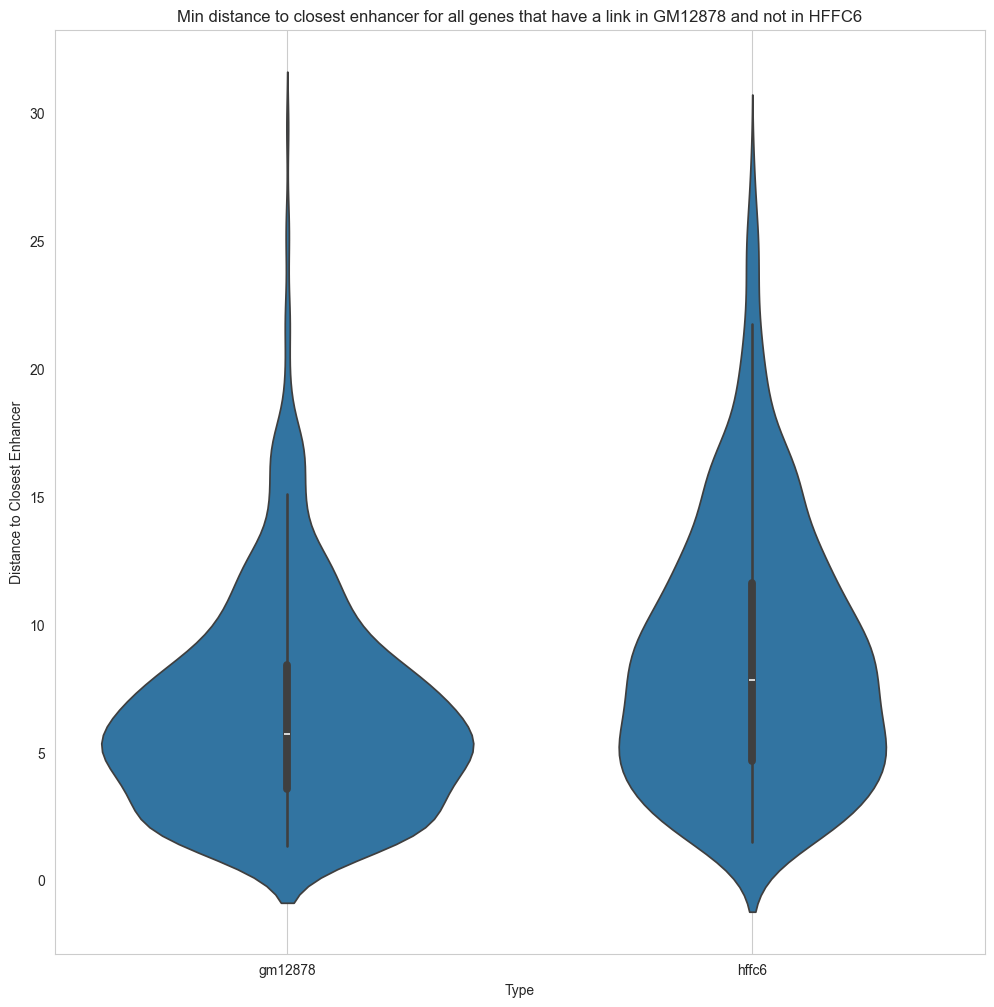

In [12]:
# box plot of the distance to the closest enhancer for all genes that have a link or not in GM12878
plt.figure(figsize=(12, 12))
sns.violinplot(
    x="type",
    y="min_dist",
    data=all_pairs_by_type_gm12878_yes_link_hffc6_no_link,
)

plt.xlabel("Type")
plt.ylabel("Distance to Closest Enhancer")

plt.title("Min distance to closest enhancer for all genes that have a link in GM12878 and not in HFFC6")
plt.grid()
plt.show()

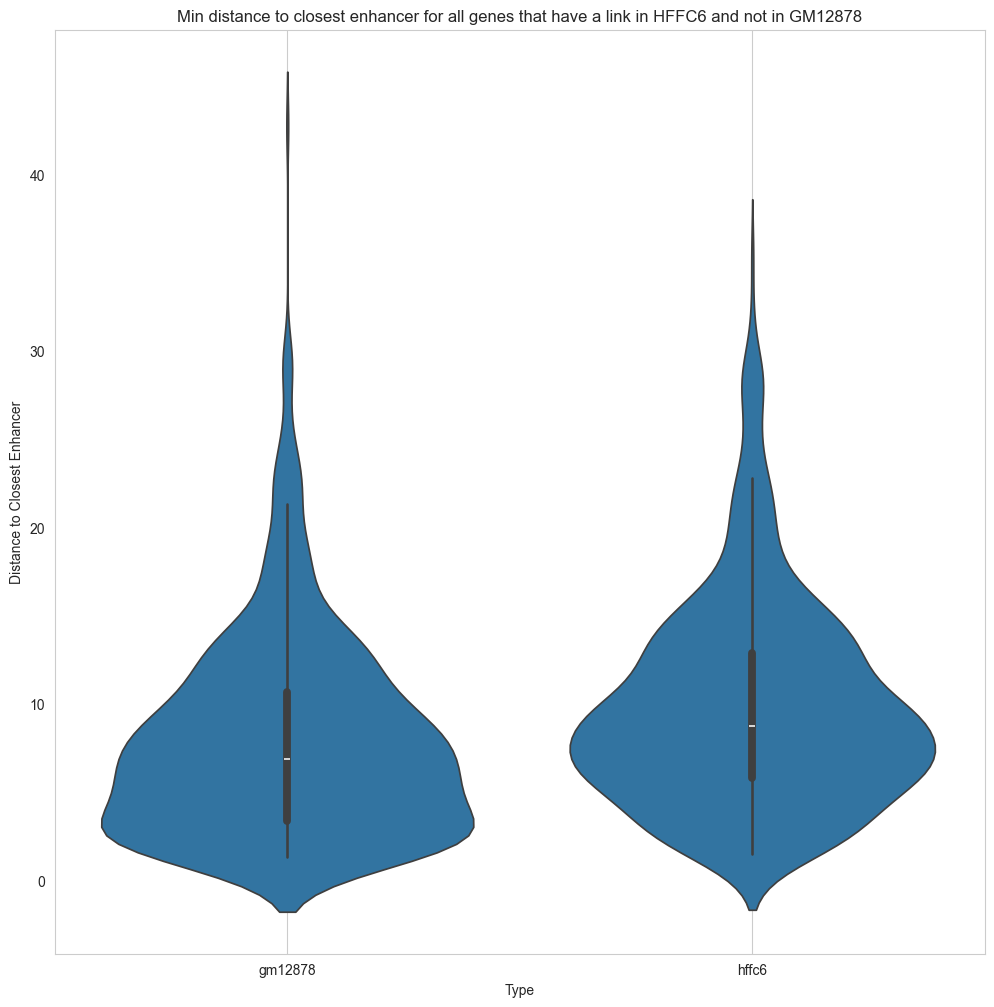

In [13]:
# box plot of the distance to the closest enhancer for all genes that have a link or not in GM12878
plt.figure(figsize=(12, 12))
sns.violinplot(
    x="type",
    y="min_dist",
    data=all_pairs_by_type_hffc6_yes_link_gm12878_no_link,
)
plt.xlabel("Type")
plt.ylabel("Distance to Closest Enhancer")

plt.title("Min distance to closest enhancer for all genes that have a link in HFFC6 and not in GM12878")
plt.grid()
plt.show()

In [14]:
all_pairs_joined_hffc6_h1esc = (
    hffc6_neanderthal_all_pairs_with_has_link
    .merge(
        h1esc_neanderthal_all_pairs_with_has_link,
        on=["region_id", "gene_id", "enh_id"],
        suffixes=("_hffc6", "_h1esc"),
        how="inner"
    )
)

# region_id, gene_id, enh_id, hffc6_avg_dist, h1esc_avg_dist -> region_id, gene_id, enh_id, avg_dist, type (hffc6, h1esc)
# group by type and gene_id, and calculate the average distance
all_pairs_by_type_hffc6_yes_link_h1esc_no_link = (
    all_pairs_joined_hffc6_h1esc
    [
        (all_pairs_joined_hffc6_h1esc["has_link_hffc6"] == True) &
        (all_pairs_joined_hffc6_h1esc["has_link_h1esc"] == False)
    ]
    .melt(
        id_vars=["region_id", "gene_id", "enh_id"],
        value_vars=["avg_dist_hffc6", "avg_dist_h1esc"],
        var_name="type",
        value_name="avg_dist"
    )
    .assign(type=lambda x: x["type"].str.replace("avg_dist_", ""))
    .groupby(["type", "gene_id"])
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .reset_index()
)

all_pairs_by_type_h1esc_yes_link_hffc6_no_link = (
    all_pairs_joined_hffc6_h1esc[
        (all_pairs_joined_hffc6_h1esc["has_link_h1esc"] == True) &
        (all_pairs_joined_hffc6_h1esc["has_link_hffc6"] == False)
    ]
    .melt(
        id_vars=["region_id", "gene_id", "enh_id"],
        value_vars=["avg_dist_hffc6", "avg_dist_h1esc"],
        var_name="type",
        value_name="avg_dist"
    )
    .assign(type=lambda x: x["type"].str.replace("avg_dist_", ""))
    .groupby(["type", "gene_id"])
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .reset_index()
)

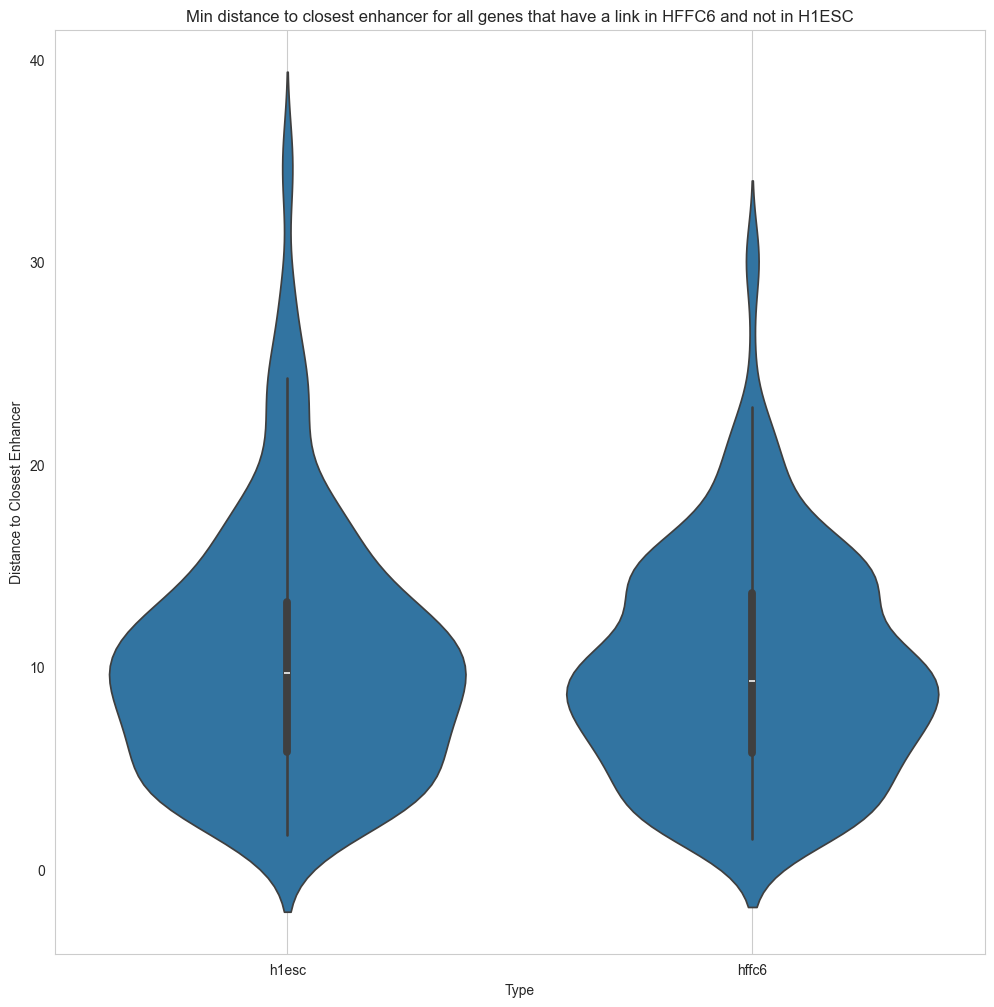

In [15]:
# box plot of the distance to the closest enhancer for all genes that have a link or not in hffc6
plt.figure(figsize=(12, 12))
sns.violinplot(
    x="type",
    y="min_dist",
    data=all_pairs_by_type_hffc6_yes_link_h1esc_no_link,
)
plt.xlabel("Type")
plt.ylabel("Distance to Closest Enhancer")

plt.title("Min distance to closest enhancer for all genes that have a link in HFFC6 and not in H1ESC")
plt.grid()
plt.show()

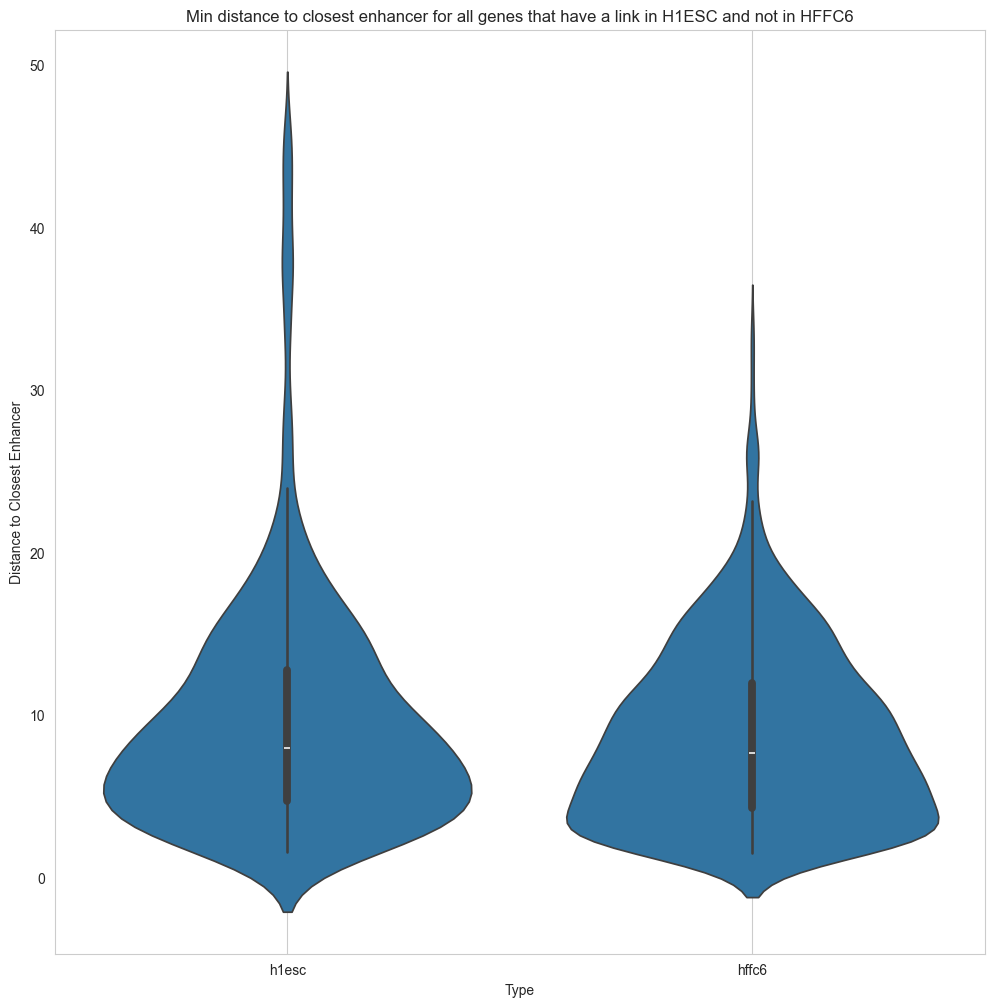

In [16]:
# box plot of the distance to the closest enhancer for all genes that have a link or not in hffc6
plt.figure(figsize=(12, 12))
sns.violinplot(
    x="type",
    y="min_dist",
    data=all_pairs_by_type_h1esc_yes_link_hffc6_no_link,
)
plt.xlabel("Type")
plt.ylabel("Distance to Closest Enhancer")

plt.title("Min distance to closest enhancer for all genes that have a link in H1ESC and not in HFFC6")
plt.grid()
plt.show()

In [27]:
# 1. Add quartile-based category columns for each cell line
for df, name in [
    (gm12878_gene_to_closest_avg_enhancer_all, 'gm12878'),
    (hffc6_gene_to_closest_avg_enhancer_all, 'hffc6'),
    (h1esc_gene_to_closest_avg_enhancer_all, 'h1esc'),
]:
    q1 = df['min_dist'].quantile(0.25)
    q3 = df['min_dist'].quantile(0.75)
    def label_quartile(x):
        if x <= q1:
            return 'small'
        elif x <= q3:
            return 'mid'
        else:
            return 'large'
    df['quartile_cat'] = df['min_dist'].apply(label_quartile)

# 2. Compare quartile jumps for genes with link in one cell line but not the other
# Example: GM12878 vs HFFC6
merged = gm12878_gene_to_closest_avg_enhancer_all[['quartile_cat', 'has_link']].merge(
    hffc6_gene_to_closest_avg_enhancer_all[['quartile_cat', 'has_link']],
    left_index=True, right_index=True, suffixes=('_gm12878', '_hffc6')
)
# Genes with link in GM12878 but not in HFFC6
jump_gm12878_link = merged[(merged['has_link_gm12878']) & (~merged['has_link_hffc6'])]
# Genes with link in HFFC6 but not in GM12878
jump_hffc6_link = merged[(merged['has_link_hffc6']) & (~merged['has_link_gm12878'])]

# Count quartile jumps
from collections import Counter
jumps_gm12878 = Counter(zip(jump_gm12878_link['quartile_cat_gm12878'], jump_gm12878_link['quartile_cat_hffc6']))
jumps_hffc6 = Counter(zip(jump_hffc6_link['quartile_cat_hffc6'], jump_hffc6_link['quartile_cat_gm12878']))

print('Quartile jumps (GM12878 link, HFFC6 no link):')
for k, v in jumps_gm12878.items():
    print(f'{k[0]} → {k[1]}: {v}')
print('\nQuartile jumps (HFFC6 link, GM12878 no link):')
for k, v in jumps_hffc6.items():
    print(f'{k[0]} → {k[1]}: {v}')

# You can repeat the above for other cell line pairs as needed.

Quartile jumps (GM12878 link, HFFC6 no link):
small → small: 81
small → mid: 90
mid → small: 94
mid → large: 108
small → large: 31
mid → mid: 283
large → mid: 61
large → large: 64
large → small: 17

Quartile jumps (HFFC6 link, GM12878 no link):
large → mid: 57
small → small: 125
small → mid: 111
mid → mid: 251
mid → small: 116
large → small: 28
mid → large: 116
large → large: 72
small → large: 33


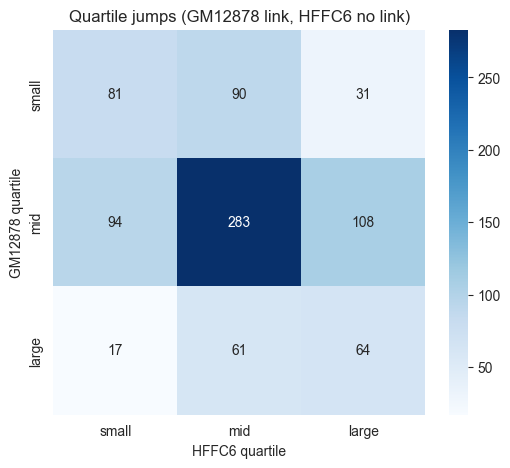

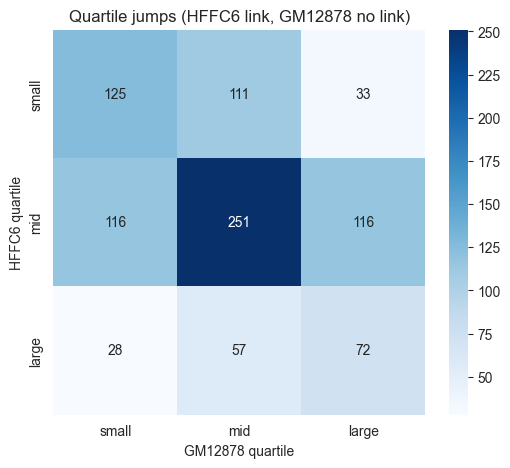

In [28]:
# Plot quartile jumps as a heatmap (not a graph)
def plot_quartile_jumps_heatmap(jumps, title, y_label, x_label):
    import numpy as np
    import seaborn as sns
    quartiles = ['small', 'mid', 'large']
    matrix = np.zeros((3, 3), dtype=int)
    for i, src in enumerate(quartiles):
        for j, dst in enumerate(quartiles):
            matrix[i, j] = jumps.get((src, dst), 0)
    plt.figure(figsize=(6, 5))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=quartiles, yticklabels=quartiles)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

plot_quartile_jumps_heatmap(jumps_gm12878, 'Quartile jumps (GM12878 link, HFFC6 no link)', 'GM12878 quartile', 'HFFC6 quartile')
plot_quartile_jumps_heatmap(jumps_hffc6, 'Quartile jumps (HFFC6 link, GM12878 no link)', 'HFFC6 quartile', 'GM12878 quartile')

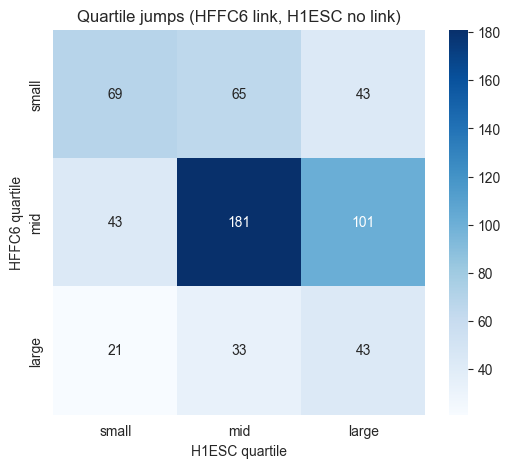

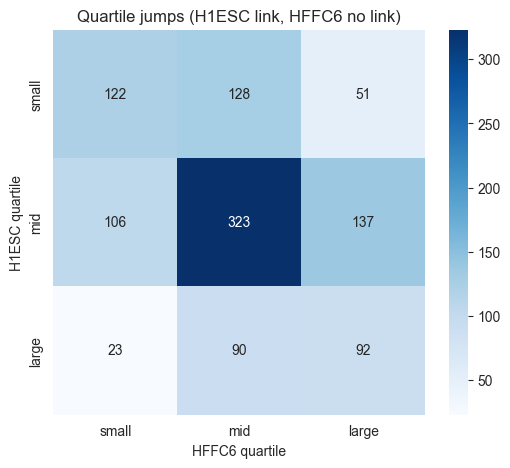

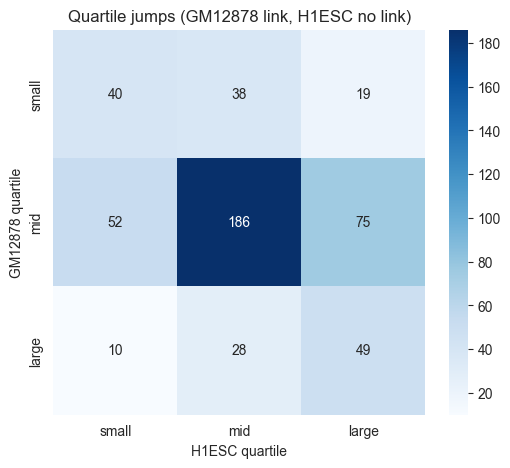

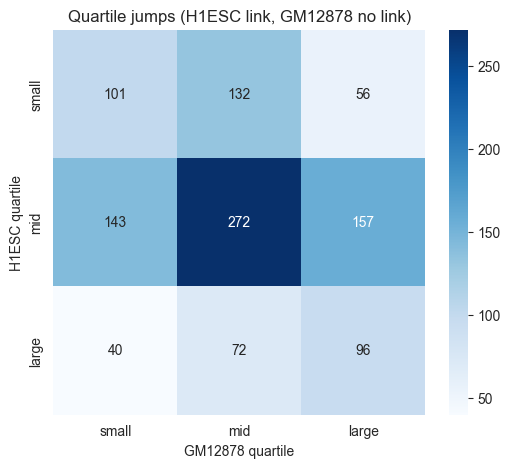

In [29]:
# HFFC6 <-> H1ESC
merged_hffc6_h1esc = hffc6_gene_to_closest_avg_enhancer_all[['quartile_cat', 'has_link']].merge(
    h1esc_gene_to_closest_avg_enhancer_all[['quartile_cat', 'has_link']],
    left_index=True, right_index=True, suffixes=('_hffc6', '_h1esc')
)
jump_hffc6_link_h1esc = merged_hffc6_h1esc[(merged_hffc6_h1esc['has_link_hffc6']) & (~merged_hffc6_h1esc['has_link_h1esc'])]
jump_h1esc_link_hffc6 = merged_hffc6_h1esc[(merged_hffc6_h1esc['has_link_h1esc']) & (~merged_hffc6_h1esc['has_link_hffc6'])]
from collections import Counter
jumps_hffc6_h1esc = Counter(zip(jump_hffc6_link_h1esc['quartile_cat_hffc6'], jump_hffc6_link_h1esc['quartile_cat_h1esc']))
jumps_h1esc_hffc6 = Counter(zip(jump_h1esc_link_hffc6['quartile_cat_h1esc'], jump_h1esc_link_hffc6['quartile_cat_hffc6']))

plot_quartile_jumps_heatmap(jumps_hffc6_h1esc, 'Quartile jumps (HFFC6 link, H1ESC no link)', 'HFFC6 quartile', 'H1ESC quartile')
plot_quartile_jumps_heatmap(jumps_h1esc_hffc6, 'Quartile jumps (H1ESC link, HFFC6 no link)', 'H1ESC quartile', 'HFFC6 quartile')

# GM12878 <-> H1ESC
merged_gm12878_h1esc = gm12878_gene_to_closest_avg_enhancer_all[['quartile_cat', 'has_link']].merge(
    h1esc_gene_to_closest_avg_enhancer_all[['quartile_cat', 'has_link']],
    left_index=True, right_index=True, suffixes=('_gm12878', '_h1esc')
)
jump_gm12878_link_h1esc = merged_gm12878_h1esc[(merged_gm12878_h1esc['has_link_gm12878']) & (~merged_gm12878_h1esc['has_link_h1esc'])]
jump_h1esc_link_gm12878 = merged_gm12878_h1esc[(merged_gm12878_h1esc['has_link_h1esc']) & (~merged_gm12878_h1esc['has_link_gm12878'])]
jumps_gm12878_h1esc = Counter(zip(jump_gm12878_link_h1esc['quartile_cat_gm12878'], jump_gm12878_link_h1esc['quartile_cat_h1esc']))
jumps_h1esc_gm12878 = Counter(zip(jump_h1esc_link_gm12878['quartile_cat_h1esc'], jump_h1esc_link_gm12878['quartile_cat_gm12878']))

plot_quartile_jumps_heatmap(jumps_gm12878_h1esc, 'Quartile jumps (GM12878 link, H1ESC no link)', 'GM12878 quartile', 'H1ESC quartile')
plot_quartile_jumps_heatmap(jumps_h1esc_gm12878, 'Quartile jumps (H1ESC link, GM12878 no link)', 'H1ESC quartile', 'GM12878 quartile')

In [30]:
# Text version for all pairs
print('Quartile jumps (GM12878 link, HFFC6 no link):')
for k, v in jumps_gm12878.items():
    print(f'{k[0]} → {k[1]}: {v}')
print('\nQuartile jumps (HFFC6 link, GM12878 no link):')
for k, v in jumps_hffc6.items():
    print(f'{k[0]} → {k[1]}: {v}')

print('\nQuartile jumps (HFFC6 link, H1ESC no link):')
for k, v in jumps_hffc6_h1esc.items():
    print(f'{k[0]} → {k[1]}: {v}')
print('\nQuartile jumps (H1ESC link, HFFC6 no link):')
for k, v in jumps_h1esc_hffc6.items():
    print(f'{k[0]} → {k[1]}: {v}')

print('\nQuartile jumps (GM12878 link, H1ESC no link):')
for k, v in jumps_gm12878_h1esc.items():
    print(f'{k[0]} → {k[1]}: {v}')
print('\nQuartile jumps (H1ESC link, GM12878 no link):')
for k, v in jumps_h1esc_gm12878.items():
    print(f'{k[0]} → {k[1]}: {v}')

Quartile jumps (GM12878 link, HFFC6 no link):
small → small: 81
small → mid: 90
mid → small: 94
mid → large: 108
small → large: 31
mid → mid: 283
large → mid: 61
large → large: 64
large → small: 17

Quartile jumps (HFFC6 link, GM12878 no link):
large → mid: 57
small → small: 125
small → mid: 111
mid → mid: 251
mid → small: 116
large → small: 28
mid → large: 116
large → large: 72
small → large: 33

Quartile jumps (HFFC6 link, H1ESC no link):
small → large: 43
mid → mid: 181
small → mid: 65
mid → small: 43
small → small: 69
mid → large: 101
large → mid: 33
large → large: 43
large → small: 21

Quartile jumps (H1ESC link, HFFC6 no link):
small → small: 122
mid → small: 106
mid → mid: 323
small → mid: 128
large → small: 23
large → mid: 90
mid → large: 137
small → large: 51
large → large: 92

Quartile jumps (GM12878 link, H1ESC no link):
small → mid: 38
mid → mid: 186
mid → small: 52
small → small: 40
mid → large: 75
small → large: 19
large → large: 49
large → mid: 28
large → small: 10

Quar